This notebook demonstrates how to perfomr systematic the policy assessment and render the policy cards. 

In [25]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from res_ind_lib import *

#Imports the function to plot render the policy experiments
from policy_assessment import *

#ask jupyter to display the plots within this notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

## baseline data

In [26]:
#Load the excel data file into a dataframe (table)
df_original=pd.read_excel("inputs/all_data_compiled.xlsx", 
                 index_col=0, #tells Pandas to use the first column (Provinces) as the index of the table
                 skiprows=[0, 2] #The first (0) row is a description of the variables and the 3rd (2) row is empty. We skip them
                ).dropna() 
df_original.index.name="province"
#Displays the first rows of that dataframe
df_original=def_ref_values(df_original)


## policy experiment data

In [27]:
##POLICY DESCRIPTION
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels = policy_info.descriptor.copy() #we make a copy so we can modify it later
policy_labels.head()

#size of the policy
pol_increment = policy_info.increment    

# Parameters

In [28]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


In [29]:
#unit for welfare and asset loses changes
unit = dict(multiplier = 1e-3, string = "million pesos per year"       )

In [30]:
pol_assess_set = colors.index

# Checking for out of bound problems

In [31]:
bounds= pd.read_csv("inputs/inputs_info.csv", index_col="key")
bounds.head(3)   

,descriptor,inf,sup
key,,,
avg_prod_k,Productivity of capital,0,10
dcap,Average consumption losses for poor people in ...,0,NaN
dcar,Average consumption losses for nonpoor people ...,0,NaN


In [32]:
clipped = check_bounds(df_original+pol_increment, bounds)

# Computing

In [33]:
deltas = compute_policies(df_original,pol_increment,pol_assess_set, bounds)
deltas.head()

Currently working on:  done.


province            Abra                Agusan del Norte                 \
outputs            dKtot dWtot_currency            dKtot dWtot_currency   
inputs                                                                    
T_rebuild_K     0.000000       0.000000         0.000000    2316.885921   
cp              0.000000       0.000000         1.260745      -3.507317   
cr              0.000000       0.000000         2.263029      -1.298831   
fap           934.765826    4280.898623      3090.609924   17218.226579   
far          5011.391772    7078.542534     19993.993601   22984.824455   

province    Agusan del Sur                Aklan                Albay  \
outputs              dKtot dWtot_currency dKtot dWtot_currency dKtot   
inputs                                                                 
T_rebuild_K       0.000000    3099.423823   NaN            NaN   NaN   
cp                1.965400      -5.440805   NaN            NaN   NaN   
cr                2.271669      -1.511818   NaN            NaN   NaN   
fap            4873.923349   27017.562763   NaN            NaN   NaN   
far           18469.531003   24604.651741   NaN            NaN   NaN   

province                        ...          Tawi-tawi                 \
outputs     dWtot_currency      ...              dKtot dWtot_currency   
inputs                          ...                                     
T_rebuild_K            NaN      ...           0.000000    1110.782855   
cp                     NaN      ...           0.420217      -0.734487   
cr                     NaN      ...           1.350390      -1.075780   
fap                    NaN      ...        1404.883123    4912.094429   
far                    NaN      ...        9641.297003   15367.193954   

province    Zambales                Zamboanga Sibugay                 \
outputs        dKtot dWtot_currency             dKtot dWtot_currency   
inputs                                                                 
T_rebuild_K      NaN            NaN               NaN            NaN   
cp               NaN            NaN               NaN            NaN   
cr               NaN            NaN               NaN            NaN   
fap              NaN            NaN               NaN            NaN   
far              NaN            NaN               NaN            NaN   

province    Zamboanga del Norte                Zamboanga del Sur  \
outputs                   dKtot dWtot_currency             dKtot   
inputs                                                             
T_rebuild_K                 NaN            NaN          0.000000   
cp                          NaN            NaN          2.767293   
cr                          NaN            NaN          5.104294   
fap                         NaN            NaN       6532.981635   
far                         NaN            NaN      40941.820428   

province                    
outputs     dWtot_currency  
inputs                      
T_rebuild_K    5544.019131  
cp               -8.169609  
cr               -3.469261  
fap           38656.101005  
far           55745.329103  

[5 rows x 160 columns]

# actual drawing

In [34]:
deltas.index

Index(['T_rebuild_K', 'cp', 'cr', 'fap', 'far', 'gdp_pc_pp', 'pi', 'pov_head',
       'protection', 'shewp', 'shewr', 'sigma_p', 'sigma_r', 'social_p',
       'social_r', 'v_p', 'v_r'],
      dtype='object', name='inputs')

Currently working on:  Quezon


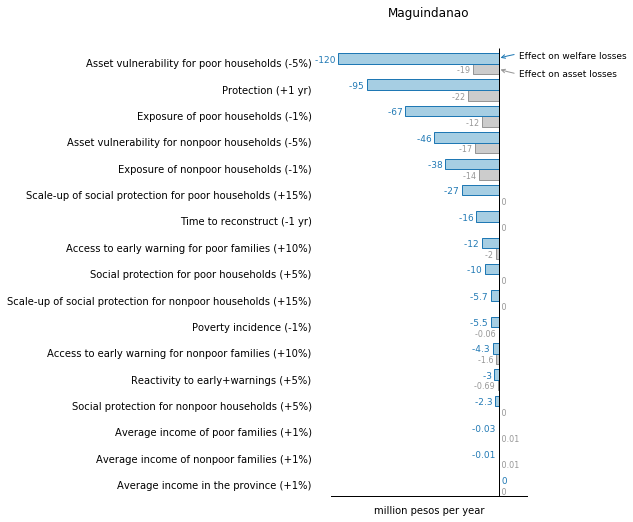

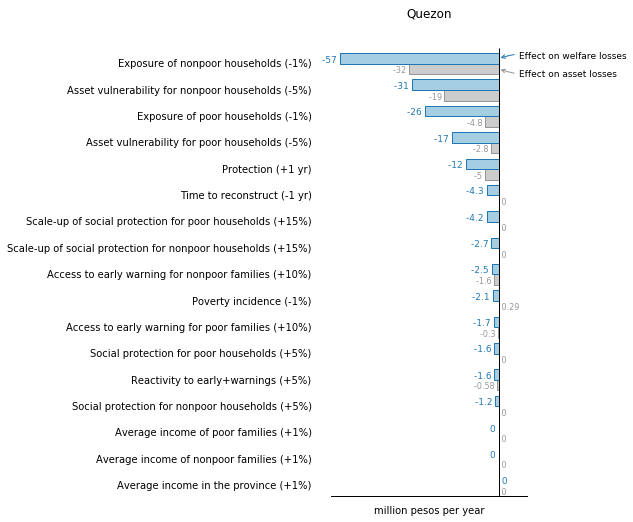

In [43]:
render_pol_cards(
    deltas,
    colors,
    policy_labels,
    pol_increment,
    unit,
        ["Maguindanao", "Quezon"])
#     df_original.index)


# Merge all cards to single pdf

Merges the individual province cards into one big multi page pdf. Requires ghostscript.

In [36]:
province_list=glob.glob("cards/*.pdf")
merge_cardfiles(province_list,"all_cards.pdf")

Merging cards....
Merging cards done


Converts the pdf files to png images. Requires Imagemagick.

In [37]:
convert_pdf_to_png("cards/")

Converting cards....
conversion to png done


# Demo: policy experiments on the multi-hazard data

Here we demonstrate how to do policy experiments on the multi hazard data. This is just a demo as the data we have now prevents us to have meaningful experiments (river floods and costal floods)

In [38]:
multi_hard_info=pd.read_csv("inputs/multi_hazard_data.csv", index_col=["province","hazard"])
multi_hard_info.head()

fap       far
province         hazard                    
Abra             coast   0.000000  0.000000
                 river   0.188715  0.149419
Agusan Del Norte coast   0.114415  0.091571
                 river   0.365700  0.292684
Agusan Del Sur   coast   0.011681  0.008747

In [39]:
fr=pd.read_csv("inputs/fa_ratios.csv", index_col=("province","hazard")).dropna()
fr.columns = fr.columns.astype(float)
fr.head()

10        100
province         hazard               
Abra             river     1  1.814138
                 coast     1  1.000000
Agusan Del Norte river     1  1.081761
                 coast     1  1.000000
Agusan Del Sur   river     1  1.335951

## policy experiments on mh data

In [40]:
##POLICY DESCRIPTION
policy_info_mh= pd.read_csv("inputs/policy_multihazard_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels_mh = policy_info_mh.descriptor.copy() #we make a copy so we can modify it later
policy_labels_mh.head()

#size of the policy
pol_increment_mh = policy_info_mh.increment    
pol_increment_mh.head()


key
('fap', 'coast')    0.01
('fap', 'river')    0.01
('far', 'coast')    0.01
('far', 'river')    0.01
Name: increment, dtype: float64

## computation

In [41]:
d_mh = compute_policies_mh(df_original,multi_hard_info,pol_increment_mh,pol_assess_set, bounds, fa_ratios=fr, multihazard_data =multi_hard_info)

Currently working on:  done.


## baseline mh data

Currently working on:  Maguindanao


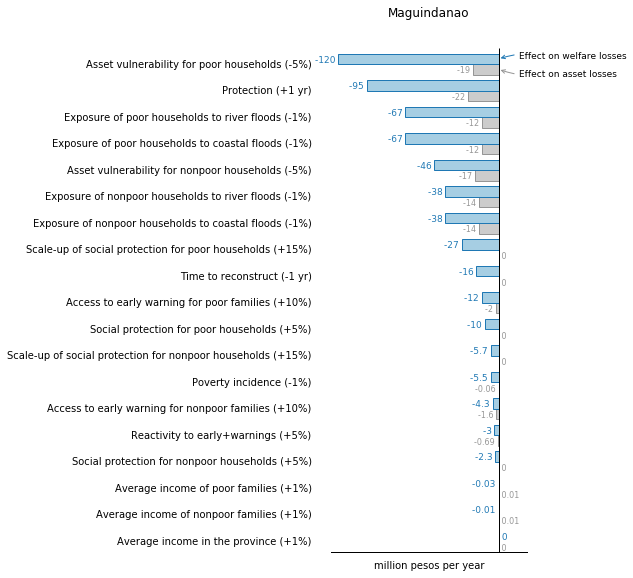

In [42]:
render_pol_cards(
    deltas.append(d_mh).drop("fap").drop("far"), #drop fap and far because superseded by multihazard info
    colors,
    policy_labels.append(policy_labels_mh),
    pol_increment.append(pol_increment_mh),
    unit,["Maguindanao"],
    outfolder="cards_coast_river/"
)

